## LOADING DATA FROM KAGGLE

In [1]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


In [2]:
%cd /content

/content


In [3]:
!mkdir input
%cd input

/content/input


In [4]:
!kaggle competitions download -c 055241hk192p1
!mkdir 055241hk192p1
!cp samples.csv train.csv.zip test.csv.zip 055241hk192p1

 54% 17.0M/31.5M [00:00<00:00, 28.5MB/s]
100% 31.5M/31.5M [00:00<00:00, 40.5MB/s]
 76% 72.0M/94.6M [00:00<00:00, 66.5MB/s]
100% 94.6M/94.6M [00:00<00:00, 108MB/s] 
  0% 0.00/87.9k [00:00<?, ?B/s]
100% 87.9k/87.9k [00:00<00:00, 90.7MB/s]


In [5]:
%cd 055241hk192p1
!unzip -q train.csv.zip
!unzip -q test.csv.zip 

/content/input/055241hk192p1


## DATA EXPLORATION

### Declare path to data folder

In [6]:
import os

base_dir = ''

train_dir = os.path.join(base_dir, 'train.csv')
test_dir = os.path.join(base_dir, 'test.csv')

### Import nessecary packages

In [107]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') #setting up 'bmh' as "Bayesian Methods for Hackers" style sheet
%matplotlib inline

In [8]:
train_df = pd.read_csv(train_dir)
test_df = pd.read_csv(test_dir)

In [78]:
test_df.head()

,# Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f985,f986,f987,f988,f989,f990,f991,f992,f993,f994,f995,f996,f997,f998,f999,f1000,f1001,f1002,f1003,f1004,f1005,f1006,f1007,f1008,f1009,f1010,f1011,f1012,f1013,f1014,f1015,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023,f1024
0,30001,1.548385,0.000000,1.821638,0.000000,1.765980,0.706634,0.000000,0.000000,0.118841,0.514384,0.280679,0.000000,0.000000,2.058144,0.000000,2.856107,1.773112,0.354395,2.027145,0.0,0.611815,0.000000,0.311365,0.0,0.244836,0.865879,0.0,0.000000,1.887619,1.863929,0.000000,2.367073,1.095520,0.323291,1.673315,0.000000,0.000000,2.670947,1.481659,...,0.472329,0.873205,0.000000,2.021482,0.341116,1.251182,2.243638,0.000000,0.070680,1.406880,0.994535,1.945908,0.086644,0.906351,0.164992,1.424353,1.263679,1.245625,1.410258,0.325073,0.918792,0.000000,1.296327,2.490774,0.000000,0.538412,0.813290,0.573764,0.129661,0.370074,1.242292,1.307992,1.270700,0.250358,1.034671,0.728463,1.292660,1.105686,0.299511,1.669667
1,30002,0.841867,0.000000,0.814518,0.326305,0.203243,0.278139,0.000000,0.793284,1.758104,0.764936,1.240908,2.072293,0.486326,1.691743,0.000000,1.929341,1.280567,0.401246,0.916930,0.0,0.047233,2.231684,1.196538,0.0,0.936710,1.263935,0.0,2.119725,0.611212,1.688470,1.660800,1.488553,0.000000,0.000000,0.937640,0.234417,0.000000,1.150364,0.315342,...,1.188820,0.000000,2.574032,0.447045,0.000000,0.000000,0.991384,0.627204,0.377995,0.622273,0.332809,0.721624,0.942563,0.000000,1.180423,3.147086,1.357030,0.000000,0.000000,1.452240,0.000000,1.305974,0.903263,0.000000,0.226647,0.931586,1.815364,1.001661,2.112926,0.222801,0.627378,0.323414,0.963698,1.160521,0.135187,0.953501,0.452462,1.937163,0.744784,0.000000
2,30003,0.513769,0.000000,2.244044,0.000000,0.000000,0.861955,0.084197,0.000000,0.000000,0.662475,0.439127,0.000000,0.000000,1.009468,0.159253,0.333241,1.093567,0.000000,1.919040,0.0,0.749443,0.000000,0.915152,0.0,0.170922,1.225322,0.0,0.000000,2.220622,0.725536,0.000000,2.556170,1.508196,1.450402,1.435504,0.000000,0.000000,1.289993,1.958031,...,0.947062,0.001745,1.391054,0.000000,0.000000,0.000000,0.000000,0.348993,1.884832,0.613375,0.000000,0.943784,1.996317,0.535431,0.022610,3.625532,1.777703,0.000000,0.000000,0.430689,0.000000,0.910035,0.893414,0.000000,0.250331,0.649465,0.939789,1.159956,1.272668,2.030895,0.521875,0.331770,0.343858,0.264370,0.157767,0.694368,0.479420,1.108407,0.564894,0.215731
3,30004,0.979345,0.185347,0.000000,0.120170,0.617745,0.177352,0.000000,1.903043,1.409005,1.477006,1.118432,2.070179,0.000000,1.083363,0.000000,0.950623,0.622709,0.000000,0.477551,0.0,0.302570,2.103658,1.840048,0.0,1.723238,0.000000,0.0,3.058941,0.023406,0.738614,1.535932,0.738068,0.000000,0.000000,1.802255,0.059761,0.000000,0.568850,0.833805,...,1.206887,0.000000,2.217909,0.000000,0.000000,0.422482,0.868588,0.153347,0.000000,1.473508,0.659295,0.000000,1.251002,0.303504,0.000000,0.942429,0.331096,0.689076,0.000000,1.272489,0.637485,0.473599,0.105639,0.524415,0.888827,0.000000,1.270760,0.000000,4.000865,0.000000,1.142519,0.000000,0.721612,1.002656,0.744457,1.262311,1.070073,0.086787,0.000000,1.113609
4,30005,0.000000,0.089834,0.000000,0.090698,0.000000,0.000000,0.000000,0.000000,0.000000,0.767373,0.466559,0.000000,0.000000,1.059852,0.000000,0.000000,0.000000,0.399487,0.000000,0.0,0.000000,0.757377,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.721347,0.000000,0.392565,0.000000,1.127471,0.000000,0.473168,0.000000,0.159748,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.485996,0.303347,0.399669,0.000000,1.120334,0.292400,0.882281,0.000000,0.212202,0.880501,0.000000,0.000000,0.209583,0.000000,0.409370,0.000000,0.000000,0.189278,0.000000,0.000000,0.000000,1.085576,0.832088,1.300438,0.000000,0.118793,0.386168,1.204944,0.682398,0.008352,0.774976,0.821177,0.000000,0.000000


In [79]:
train_df.head()

,# Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f986,f987,f988,f989,f990,f991,f992,f993,f994,f995,f996,f997,f998,f999,f1000,f1001,f1002,f1003,f1004,f1005,f1006,f1007,f1008,f1009,f1010,f1011,f1012,f1013,f1014,f1015,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023,f1024,Category
0,1,0.685075,0.000000,2.159684,0.000000,0.000000,1.855760,0.985496,0.000000,0.000000,0.000000,0.166518,0.000000,0.0,0.927346,0.590299,0.364779,0.721798,0.333858,1.218988,0.817693,0.379442,0.000000,1.369456,0.000000,0.0,0.000000,0.0,0.0,1.152172,1.427282,0.000000,1.376098,0.478925,0.000000,0.605684,1.001201,0.000000,0.293933,2.312609,...,0.000000,2.970812,0.000000,0.000000,0.035363,1.251016,1.155578,0.299259,0.863717,1.448987,0.085982,1.350596,0.000000,0.407195,3.773583,1.022316,0.060898,0.000000,0.695031,0.000000,1.060223,0.860375,0.442289,0.163974,0.543900,1.767029,0.702262,3.539757,0.941511,1.570190,0.000000,0.687147,1.416029,0.398683,1.203272,0.833575,2.119920,0.266268,0.000000,8
1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.176542,0.704747,0.000000,0.192226,0.868009,0.608963,1.028225,0.0,1.481206,0.583469,0.184480,0.000000,0.511936,0.000000,0.000000,0.000000,1.276256,0.534841,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.887524,1.904664,0.000000,0.791537,0.000000,1.288954,0.075975,0.432621,0.000000,0.809392,...,1.002027,2.302625,0.279369,0.009015,0.630017,0.000000,0.798314,1.415711,1.010964,1.607744,0.014198,2.020489,0.000000,0.612987,3.451463,1.602385,0.030343,0.000000,0.059625,0.000000,1.066282,1.360797,0.559455,0.327810,1.203236,1.195106,1.137062,3.593266,2.300208,1.768872,0.000000,0.935894,0.508511,0.267381,1.249635,1.641100,2.148436,0.582175,0.078609,3
2,3,2.002489,0.000000,0.978972,0.000000,0.327216,0.000000,0.454218,0.305732,0.000000,1.249242,1.773079,0.266320,0.0,0.932390,0.888442,1.170573,0.500965,0.324251,0.749860,0.000000,1.150037,1.779132,0.771711,0.004418,0.0,3.358535,0.0,0.0,0.000000,1.359771,1.357755,1.757337,2.039395,0.555814,2.429130,0.000000,0.000000,0.627085,0.441804,...,0.000000,0.559122,0.277996,0.000000,0.000000,0.108532,0.693938,0.317077,0.000000,1.464030,0.201412,0.739319,0.123736,0.055401,0.827199,0.073738,0.000000,0.000000,0.000000,0.158605,0.043113,0.000000,0.595746,0.000000,0.000000,1.070579,1.061942,1.288309,1.183666,0.000000,0.498108,0.918560,1.056273,0.508074,0.737373,0.726668,1.169889,0.000000,0.000000,7
3,4,0.722091,0.000000,2.304015,0.000000,0.000000,1.823341,0.721335,0.000000,0.166690,0.246660,0.389565,0.000000,0.0,0.865144,0.000000,1.067876,1.176675,0.371711,1.006336,0.000000,0.000000,0.000000,0.289524,0.000000,0.0,0.000000,0.0,0.0,2.468661,2.136180,0.000000,0.958361,0.402866,0.000000,1.683738,0.555321,0.000000,0.935477,1.333827,...,1.742886,1.880181,0.568967,0.000000,1.000142,0.319556,0.000000,0.269205,0.913789,0.000000,0.000000,2.044642,2.088821,0.153658,2.469944,1.959049,0.570214,0.530098,0.000000,0.000000,0.237062,0.000000,1.301427,0.000000,0.000000,1.636730,0.359067,2.053269,0.000000,2.078060,1.587578,0.365814,0.000000,0.747819,0.074074,0.000000,0.520719,0.000000,0.931651,1
4,5,0.000000,0.068588,1.038505,0.097392,0.000000,0.598382,1.102372,0.000000,0.000000,0.682103,0.546078,0.000000,0.0,0.969638,0.000000,0.000000,0.000000,0.763285,0.008783,0.000000,0.000000,0.619380,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.626301,0.299262,0.588616,0.421499,0.651188,0.000000,1.074915,0.000000,0.387621,0.000000,1.230561,...,0.000000,0.509055,0.000000,0.000000,0.000000,0.488458,0.401302,0.572882,0.000000,1.206674,0.607579,1.473128,0.013943,0.153198,0.927134,0.354164,0.000000,0.143861,0.000000,0.215866,0.000000,0.000000,0.111050,0.104496,0.000000,0.504245,1.066074,0.793241,1.627079,0.863230,0.071165,0.000000,1.121873,0.778090,0.334674,0.583489,0.428917,0.000000,0.000000,1


In [80]:
train_df.describe()

,# Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f986,f987,f988,f989,f990,f991,f992,f993,f994,f995,f996,f997,f998,f999,f1000,f1001,f1002,f1003,f1004,f1005,f1006,f1007,f1008,f1009,f1010,f1011,f1012,f1013,f1014,f1015,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023,f1024,Category
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,0.548335,0.142982,1.327065,0.128933,0.259841,0.755578,0.474272,0.325490,0.195795,0.724247,0.608043,0.527577,0.069441,1.348245,0.467943,0.582925,0.714268,0.376525,0.857739,0.227490,0.568754,0.892753,0.818004,0.210730,0.586091,0.755647,0.100092,0.644137,0.899137,0.781134,0.702562,1.294067,0.786471,0.583645,1.027236,0.261554,0.187609,0.493152,1.403712,...,0.411794,1.472876,0.433048,0.187460,0.295769,0.378949,0.550714,0.531969,0.734052,1.008082,0.521480,1.235658,0.550187,0.433436,1.585419,0.966898,0.204341,0.285354,0.783499,0.211434,0.660546,0.506496,0.706748,0.305619,0.466323,1.222237,0.680346,1.661462,0.956885,0.837931,0.464027,0.744480,0.706666,0.521336,0.834522,0.819884,1.016297,0.242960,0.562150,4.482333
std,8660.398374,0.692331,0.278639,0.822520,0.305218,0.473721,0.701042,0.499587,0.470352,0.443584,0.691459,0.503015,0.828090,0.188366,0.611919,0.592398,0.668749,0.505254,0.378177,0.679639,0.417297,0.480709,0.824398,0.635919,0.384468,0.828250,0.890598,0.255035,1.003217,0.858692,0.745201,0.784759,0.861531,0.531161,0.749539,0.530336,0.421129,0.373053,0.620445,0.921114,...,0.620678,0.996170,0.548810,0.387732,0.451690,0.529763,0.450955,0.540659,0.541347,0.630058,0.464771,0.604861,0.688160,0.477483,1.138250,0.522790,0.471943,0.477909,1.021037,0.323876,0.669252,0.609645,0.700933,0.405506,0.533670,0.741847,0.436596,1.024297,0.750247,0.542100,0.510473,0.497523,0.483612,0.494070,0.530120,0.635960,0.642256,0.390758,0.679222,2.874270
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,0.000000,0.000000,0.610691,0.000000,0.000000,0.166936,0.000000,0.000000,0.000000,0.158326,0.241183,0.000000,0.000000,0.945072,0.000000,0.000000,0.303053,0.000000,0.246200,0.000000,0.035869,0.214203,0.187303,0.000000,0.000000,0.000000,0.000000,0.000000,0.095517,0.067746,0.000000,0.522561,0.375226,0.000000,0.688172,0.000000,0.000000,0.000000,0.582344,...,0

In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 1026 entries, # Id to Category
dtypes: float64(1024), int64(2)
memory usage: 234.8 MB


In [117]:
def class_distribution(df):
    value = df['Category'].value_counts().values
    index = df['Category'].value_counts().index
    dis = pd.DataFrame(value, columns=['Quantity'], index = index)
    sort_dis = dis.sort_index()
    sort_dis.index.name = 'Category'
    
    return sort_dis

In [118]:
train_sort_dis = class_distribution(train_df)

In [119]:
train_sort_dis

,Quantity
Category,
0,2819
1,3370
2,2996
3,2985
4,2958
5,2841
6,2994
7,3149
8,2883


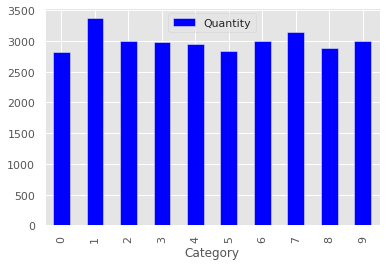

In [120]:
train_sort_dis.plot(kind = 'bar', color = 'blue', y = 'Quantity')

*Check to see if the dataset contain any missing values*

In [109]:
cols_with_missing = [col for col in train_df.columns
                     if train_df[col].isnull().any()]

if len(cols_with_missing) > 0:
    print(cols_with_missing)
else:
    print('All features don`t have missing values' )

All features don`t have missing values


**Splitting train_data into training and validation set**

In [9]:
from sklearn.model_selection import train_test_split

train_data, valid_data = train_test_split(train_df, test_size = 0.2, random_state = 42)

In [121]:
label_train_dis = class_distribution(train_data)
label_train_dis

,Quantity
Category,
0,2278
1,2697
2,2400
3,2341
4,2360
5,2268
6,2399
7,2524
8,2335


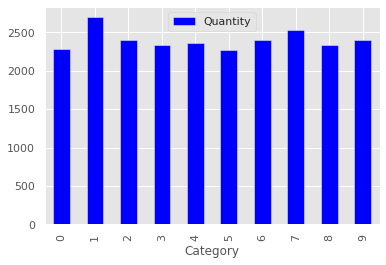

In [122]:
label_train_dis.plot(kind = 'bar', color = 'blue', y = 'Quantity')

**Drop # Id and Category features**

In [10]:
train_features = train_data.drop(['# Id', 'Category'], axis = 1)
train_label = train_data['Category'].copy()

In [11]:
valid_features = valid_data.drop(['# Id', 'Category'], axis = 1)
valid_label = valid_data['Category'].copy()

## MODELING

In [12]:
from sklearn.svm import SVC, LinearSVC

In [13]:
all_features = train_df.drop(['# Id', 'Category'], axis = 1)
all_label = train_df['Category'].copy()

*Here I choose SVM with Gaussian Kernel to train*

In [23]:
svm_clf = SVC(kernel="rbf", random_state = 42)

*Using PCA to compress data*

In [31]:
from sklearn.decomposition import PCA

# intialize pca
pca = PCA(n_components='mle', svd_solver='auto', random_state=42)

# fit and transform data
X_train_pca = pca.fit_transform(train_features)
X_valid_pca = pca.transform(valid_features)

*Using RandomizedSearchCV of Sklearn to find the optimal hyper parameter of SVC, just use the first 4000 examples to speed up progress*

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 10), "C": uniform(0.1, 100)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3, n_jobs=-1)
rnd_search_cv.fit(X_train_pca[:4000], train_label[:4000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=42,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0d5e9794e0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0d5e979358>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [67]:
rnd_search_cv.best_estimator_

SVC(C=84.73502026289596, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.0027420799831797925, kernel='rbf', max_iter=-1, probability=False,
    random_state=42, shrinking=True, tol=0.001, verbose=False)

In [68]:
rnd_search_cv.best_score_

0.9872501858598083

*Use all training data to train svc with optimal param*

In [69]:
rnd_search_cv.best_estimator_.fit(X_train_pca, train_label)

SVC(C=84.73502026289596, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.0027420799831797925, kernel='rbf', max_iter=-1, probability=False,
    random_state=42, shrinking=True, tol=0.001, verbose=False)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
y_pred = rnd_search_cv.best_estimator_.predict(X_valid_pca)
accuracy_score(valid_label, y_pred)

0.9955

In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, valid_label))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       541
           1       0.99      0.99      0.99       671
           2       1.00      0.99      0.99       598
           3       0.99      1.00      1.00       640
           4       1.00      1.00      1.00       598
           5       1.00      0.99      0.99       575
           6       1.00      1.00      1.00       594
           7       1.00      0.99      0.99       630
           8       1.00      1.00      1.00       549
           9       0.99      1.00      0.99       604

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [72]:
X_all_pca = pca.transform(all_features)

In [73]:
rnd_search_cv.best_estimator_.fit(X_all_pca, all_label)

SVC(C=84.73502026289596, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.0027420799831797925, kernel='rbf', max_iter=-1, probability=False,
    random_state=42, shrinking=True, tol=0.001, verbose=False)

*Apply to test data*

In [74]:
test_data = test_df.drop(['# Id'], axis = 1)
X_pred_pca = pca.transform(test_data)

predictions = rnd_search_cv.best_estimator_.predict(X_pred_pca)

In [75]:
output = pd.DataFrame({'# Id':test_df['# Id'], 'Category': predictions})

In [76]:
output.to_csv('my_submission.csv', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
